In [12]:
import pandas as pd
from datetime import datetime, date

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Choose a condition: https://github.com/synthetichealth/synthea/wiki/Module-Gallery

In [6]:
!ls ../data/csv/

100k_synthea_covid19_csv  imaging_studies.csv  payers.csv
allergies.csv		  immunizations.csv    payer_transitions.csv
careplans.csv		  medications.csv      procedures.csv
conditions.csv		  observations.csv     providers.csv
devices.csv		  organizations.csv    supplies.csv
encounters.csv		  patients.csv


In [7]:
# Load all data at once
conditions = pd.read_csv("../data/csv/conditions.csv")
patients = pd.read_csv("../data/csv/patients.csv")
observations = pd.read_csv("../data/csv/observations.csv")
#care_plans = pd.read_csv("../data/csv/careplans.csv")
encounters = pd.read_csv("../data/csv/encounters.csv")
devices = pd.read_csv("../data/csv/devices.csv")
#supplies = pd.read_csv('../data/csv/supplies.csv')
procedures = pd.read_csv("../data/csv/procedures.csv")
medications = pd.read_csv("../data/csv/medications.csv")

# Patients

In [15]:
print('Number of patients:', patients.shape)

# convert birthdate to datetime
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])

# calculate age
patients['AGE'] = patients['BIRTHDATE'].apply(lambda x : (datetime.now().year - x.year))

patients.head(3)

Number of patients: (124150, 26)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,1ff7f10f-a204-4bb1-aa72-dd763fa99482,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,5
1,9bcf6ed5-d808-44af-98a0-7d78a29ede72,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,94568.40,1870.72,6
2,5163c501-353c-4a82-b863-a3f1df2d6cf1,2004-01-09,NaN,999-73-2461,S99999063,NaN,NaN,Jimmie93,Harris789,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,375754.62,3131.44,18


<AxesSubplot:>

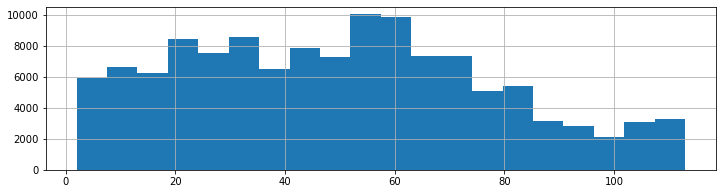

In [20]:
patients['AGE'].hist(bins=20, figsize=(12,3))

# Load conditions/diagnoses/problem list

In [10]:
print('Number of conditions:',conditions.shape)
conditions.head(3)

Number of conditions: (1143900, 6)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2019-02-15,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,d317dacb-d801-4136-be7d-440094f7ae83,65363002,Otitis media
1,2019-10-30,2020-01-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,759cfd9c-b40b-45df-a5b2-fca418027a6a,65363002,Otitis media
2,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,386661006,Fever (finding)


In [11]:
# get top 10 conditions
conditions['DESCRIPTION'].value_counts()[:20]

Suspected COVID-19                         91039
COVID-19                                   88166
Fever (finding)                            80865
Cough (finding)                            61710
Body mass index 30+ - obesity (finding)    50206
Loss of taste (finding)                    46121
Prediabetes                                38801
Anemia (disorder)                          35972
Fatigue (finding)                          34951
Hypertension                               32560
Sputum finding (finding)                   30653
Chronic sinusitis (disorder)               26739
Miscarriage in first trimester             21736
Pneumonia (disorder)                       18177
Hypoxemia (disorder)                       18177
Respiratory distress (finding)             18177
Dyspnea (finding)                          17939
Wheezing (finding)                         17939
Viral sinusitis (disorder)                 16135
Hyperlipidemia                             15404
Name: DESCRIPTION, d

In [21]:
# get patients and dates associated with one of these conditions
condition = 'Chronic congestive heart failure (disorder)'
conditions.loc[conditions['DESCRIPTION']==condition].head(30)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
742,2008-09-12,NaN,8742348d-72b0-40b3-a970-08e50b30e256,80c2fa96-0258-45f6-9ae7-de0e6657b118,88805009,Chronic congestive heart failure (disorder)
1644,2005-04-18,NaN,a06df52a-f0a5-459a-9875-972cb2d558b5,1f44f269-8e86-4f86-86d5-fa7a6148486e,88805009,Chronic congestive heart failure (disorder)
1855,2001-07-19,NaN,03533487-733a-49a7-83ca-306c3bd8a792,0a1695a5-4600-4ad9-a78c-42f39b53e50b,88805009,Chronic congestive heart failure (disorder)
2048,2019-02-05,NaN,4c0ba910-3cd0-46ad-a3b8-186e033f091b,991bad9b-d0b1-42fb-9977-2e52abbb5e9e,88805009,Chronic congestive heart failure (disorder)
2250,1987-06-15,NaN,c73b953b-1bf7-4bff-a72c-ba2701d2215a,a74817a4-3f4e-46b9-8e3a-dffe8327ae66,88805009,Chronic congestive heart failure (disorder)
2396,2008-05-20,NaN,23ae1fe6-fddb-4b37-be63-1179436923d0,f33285c3-e102-4575-8db4-038d1a8d3e5a,88805009,Chronic congestive heart failure (disorder)
2823,2000-05-22,NaN,09f19aaf-73d1-4535-b8e8-6a05a2c92408,835a2dc7-0d17-4952-9261-c62f89941810,88805009,Chronic congestive heart failure (disorder)
3064,2019-05-18,NaN,076f1562-f4cd-487e-954f-04dba0df8285,73e66100-1544-4660-90ff-b5776d1730a3,88805009,Chronic congestive heart failure (disorder)
3133,2005-01-16,NaN,77b861bc-5098-4f09-a7f1-b7de5c6c704d,36e0c9d3-e426-45c2-9759-19377bc53f74,88805009,Chronic congestive heart failure (disorder)
3202,1995-12-28,NaN,7682a5b1-0a4f-453f-8f8c-d4d6d0c0975e,6636d202-2bce-4275-a2b1-703583c12673,88805009,Chronic congestive heart failure (disorder)


In [23]:
# see how much data is available for a few of these patients prior to diagnosis
patient = conditions.loc[conditions['DESCRIPTION']==condition]['PATIENT'].values[1]
patients.loc[patients['Id']==patient]

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
178,a06df52a-f0a5-459a-9875-972cb2d558b5,1950-04-13,2006-05-06,999-42-7324,S99957381,X74200334X,Mr.,Korey682,Dicki44,NaN,NaN,M,white,nonhispanic,M,Abington Massachusetts US,388 Cassin Approach Apt 20,Freetown,Massachusetts,Bristol County,NaN,41.81502,-71.030064,1223622.93,12674.53,72


In [24]:
conditions.loc[conditions['PATIENT']==patient]

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
1640,1965-04-10,NaN,a06df52a-f0a5-459a-9875-972cb2d558b5,294c69e7-7384-485e-a104-855ac4f7b256,74400008,Appendicitis
1641,1965-04-10,NaN,a06df52a-f0a5-459a-9875-972cb2d558b5,be062a0b-5b70-402f-8092-4605fb695aff,428251008,History of appendectomy
1642,1968-06-06,NaN,a06df52a-f0a5-459a-9875-972cb2d558b5,33684f05-b694-474a-97e8-53181250c25f,59621000,Hypertension
1643,2000-04-13,NaN,a06df52a-f0a5-459a-9875-972cb2d558b5,b1e736e3-ce75-4bdf-8aa3-8cb3c1a094a3,68496003,Polyp of colon
1644,2005-04-18,NaN,a06df52a-f0a5-459a-9875-972cb2d558b5,1f44f269-8e86-4f86-86d5-fa7a6148486e,88805009,Chronic congestive heart failure (disorder)


In [25]:
observations.loc[observations['PATIENT']==patient]

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
27388,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,8302-2,Body Height,186.0,cm,numeric
27389,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
27390,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,29463-7,Body Weight,95.7,kg,numeric
27391,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,39156-5,Body Mass Index,27.7,kg/m2,numeric
27392,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,8462-4,Diastolic Blood Pressure,88.0,mm[Hg],numeric
27393,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,8480-6,Systolic Blood Pressure,119.0,mm[Hg],numeric
27394,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,8867-4,Heart rate,87.0,/min,numeric
27395,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,9279-1,Respiratory rate,14.0,/min,numeric
27396,2006-01-05,a06df52a-f0a5-459a-9875-972cb2d558b5,a76c6579-5def-4175-9d55-5f1a8c6c7aca,72166-2,Tobacco smoking status NHIS,Never smoker,NaN,text
27397,2006-05-04,a06df52a-f0a5-459a-9875-972cb2d558b5,20e1ac78-ec15-4e0f-89ed-79f4e8004d41,2339-0,Glucose,67.0,mg/dL,numeric


In [27]:
encounters.loc[encounters['PATIENT']==patient].head(3)

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
2971,294c69e7-7384-485e-a104-855ac4f7b256,1965-04-11T01:31:53Z,1965-04-11T02:31:53Z,a06df52a-f0a5-459a-9875-972cb2d558b5,8ad64ecf-c817-3753-bee7-006a8e662e06,5eecc0dd-deeb-30f0-b17e-cd5acd1fb9fb,6e2f1a2d-27bd-3701-8d08-dae202c58632,emergency,50849002,Emergency Room Admission,129.16,129.16,0.00,74400008.0,Appendicitis
2972,be062a0b-5b70-402f-8092-4605fb695aff,1965-04-11T01:31:53Z,1965-04-13T02:20:53Z,a06df52a-f0a5-459a-9875-972cb2d558b5,8ad64ecf-c817-3753-bee7-006a8e662e06,5eecc0dd-deeb-30f0-b17e-cd5acd1fb9fb,6e2f1a2d-27bd-3701-8d08-dae202c58632,inpatient,183452005,Encounter Inpatient,77.49,77.49,2.49,74400008.0,Appendicitis
2973,33684f05-b694-474a-97e8-53181250c25f,1968-06-07T01:31:53Z,1968-06-07T01:46:53Z,a06df52a-f0a5-459a-9875-972cb2d558b5,150d4bec-d11c-3014-8818-45127743725d,88e12b5f-8858-3371-9538-5f8b07e0ee5a,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,54.16,NaN,NaN


In [ ]:
chf
age
'Left ventricular Ejection fraction'
'shortness of breath'
'exercise intolerance'
lab:NT-proBNP 200-2000